<h3>Kütüphane yüklemeleri</h3>

In [1]:
#################################################
########Gerekli Kütüphane ve Fonksiyonlar########
#################################################
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score,validation_curve
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler







pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 170) 
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3F' % x)
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter (action='ignore', category=FutureWarning) 
warnings.simplefilter (action="ignore", category=ConvergenceWarning)
from pandas.errors import SettingWithCopyWarning
warnings.filterwarnings(action="ignore", category=SettingWithCopyWarning)


In [2]:
import pandas as pd

def check_df(dataframe, head=5):
    # Veri çerçevesinin boyutları
    print("################## Shape ###################")
    print(f"Shape: {dataframe.shape}")
    
    # Veri türleri
    print("\n################ Types ####################")
    print(dataframe.dtypes)
    
    # İlk n satır
    print(f"\n################# Head ({head}) ###################")
    print(dataframe.head(head))
    
    # Son n satır
    print(f"\n################# Tail ({head}) ###################")
    print(dataframe.tail(head))
    
    # Eksik değerler
    print("\n############## NA ####################")
    print(dataframe.isnull().sum())
    
    # İstatistiksel özet (özelleştirilmiş yüzdelikler)
    print("\n############## Quantiles ####################")
    print(dataframe.describe(percentiles=[.05, .25, .5, .75, .95]).T)

# Örnek CSV dosyasını yükleme
df = pd.read_csv("hitters.csv")

# Fonksiyonu çağırma
check_df(df)


################## Shape ###################
Shape: (322, 20)

################ Types ####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

################# Head (5) ###################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20     NaN         A
1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N        W   

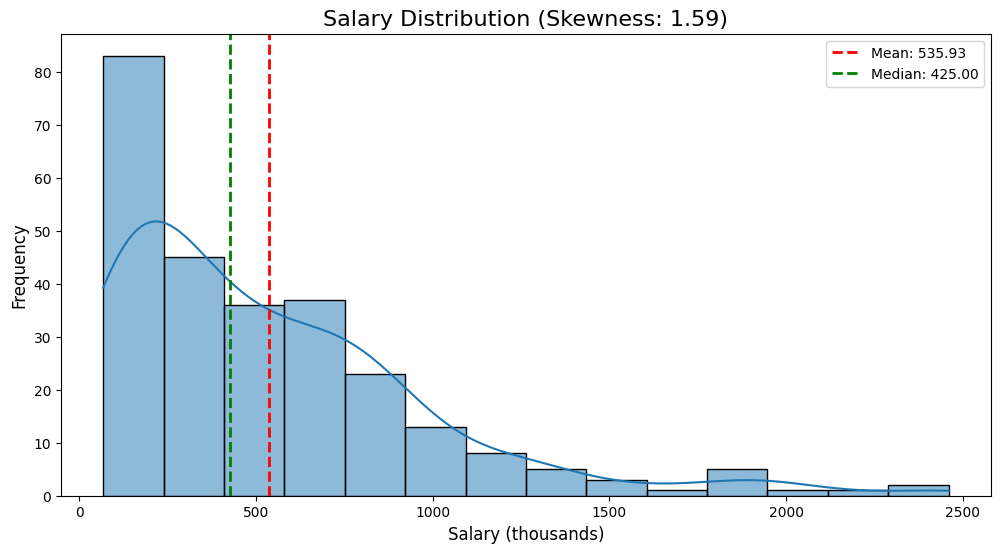

Skewness: 1.59
Mean: 535.93
Median: 425.00
Standard Deviation: 451.12
Minimum: 67.50
Maximum: 2460.00
Shapiro-wilk Test p-value: 0.0000


In [3]:

def show_salary_skewness(df):
    # Salary sütunundaki eksik değerleri kaldırma
    salary = df['Salary'].dropna()

    # Çarpıklık değerini hesaplama
    skewness = salary.skew()

    # Histogram ve yoğunluk grafiği çizme
    plt.figure(figsize=(12, 6))
    sns.histplot(salary, kde=True)
    plt.title(f"Salary Distribution (Skewness: {skewness:.2f})", fontsize=16)
    plt.xlabel("Salary (thousands)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

    # Ortalama ve medyanı gösterme
    plt.axvline(salary.mean(), color='r', linestyle='dashed', linewidth=2, label=f"Mean: {salary.mean():.2f}")
    plt.axvline(salary.median(), color='g', linestyle='dashed', linewidth=2, label=f"Median: {salary.median():.2f}")
    plt.legend()

    # Grafik gösterimi
    plt.show()

    # İstatistiksel bilgileri yazdırma
    print(f"Skewness: {skewness:.2f}")
    print(f"Mean: {salary.mean():.2f}")
    print(f"Median: {salary.median():.2f}")
    print(f"Standard Deviation: {salary.std():.2f}")
    print(f"Minimum: {salary.min():.2f}")
    print(f"Maximum: {salary.max():.2f}")
    
    #shapiro-wilk normallik testi
    _,p_value=stats.shapiro(salary)
    print(f"Shapiro-wilk Test p-value: {p_value:.4f}")
    plt.show(block=True)
    
############### Fonksiyonu çağırma ###############
show_salary_skewness(df)
#verilerde sağa doğru bir çarpıklık var


Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0
        League  Ratio
League               
A          175 54.348
N          147 45.652
######################################################


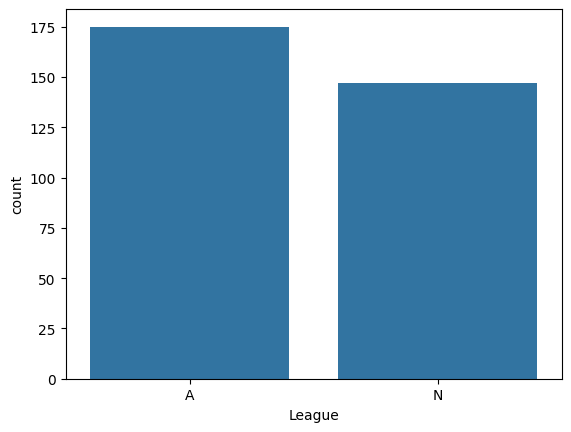

          Division  Ratio
Division                 
W              165 51.242
E              157 48.758
######################################################


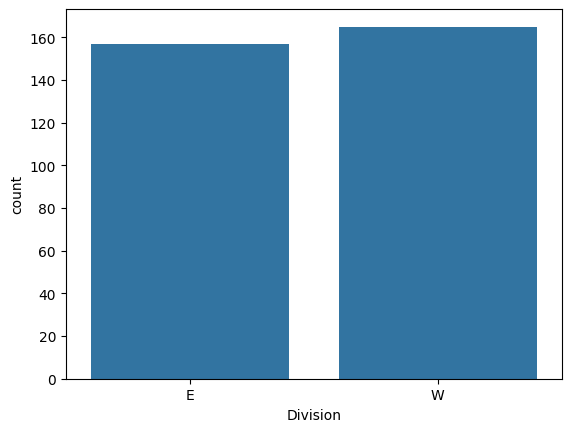

           NewLeague  Ratio
NewLeague                  
A                176 54.658
N                146 45.342
######################################################


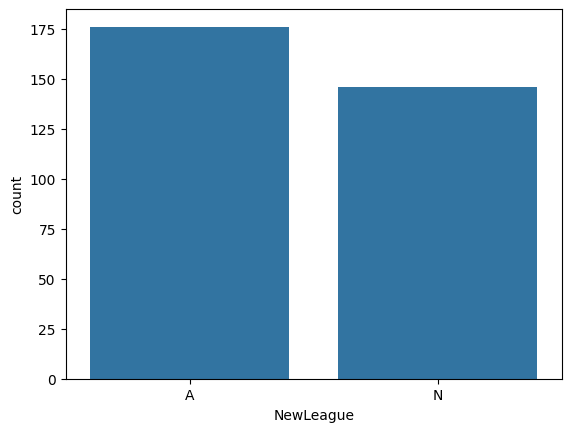

count   322.000
mean    380.929
std     153.405
min      16.000
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64


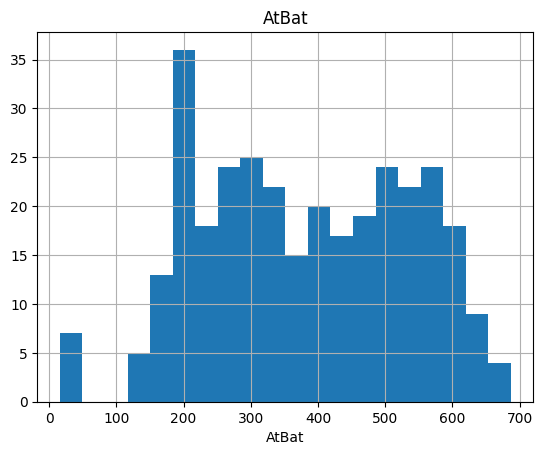

count   322.000
mean    101.025
std      46.455
min       1.000
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64


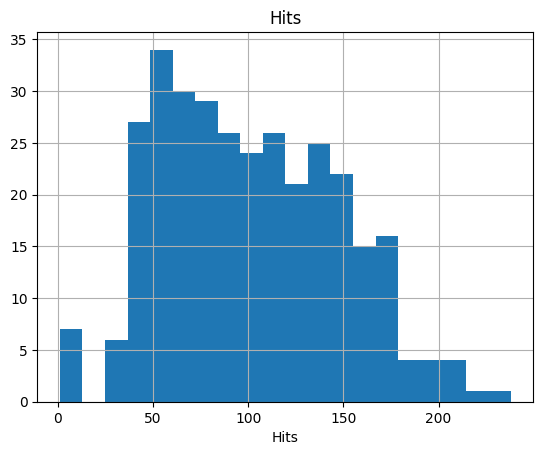

count   322.000
mean     10.770
std       8.709
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64


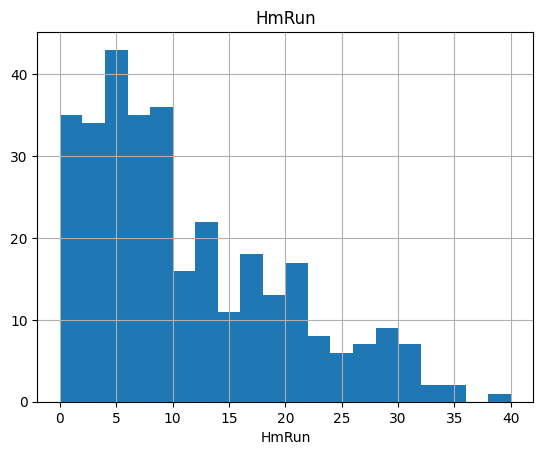

count   322.000
mean     50.910
std      26.024
min       0.000
5%       17.000
10%      20.100
20%      27.000
30%      33.000
40%      41.000
50%      48.000
60%      55.600
70%      66.000
80%      75.800
90%      89.000
95%      94.000
99%     107.790
max     130.000
Name: Runs, dtype: float64


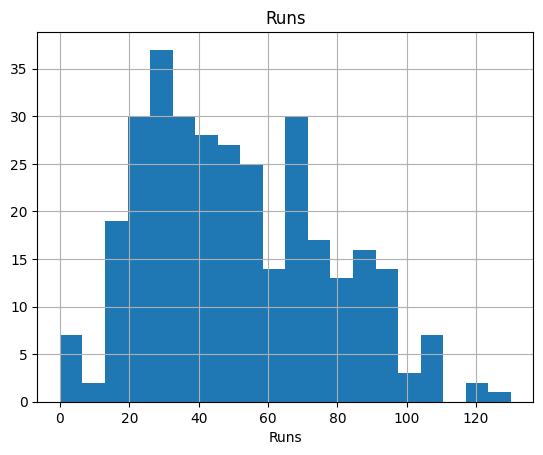

count   322.000
mean     48.028
std      26.167
min       0.000
5%       14.000
10%      19.000
20%      26.000
30%      30.000
40%      36.400
50%      44.000
60%      49.000
70%      58.000
80%      73.000
90%      86.000
95%      96.000
99%     112.370
max     121.000
Name: RBI, dtype: float64


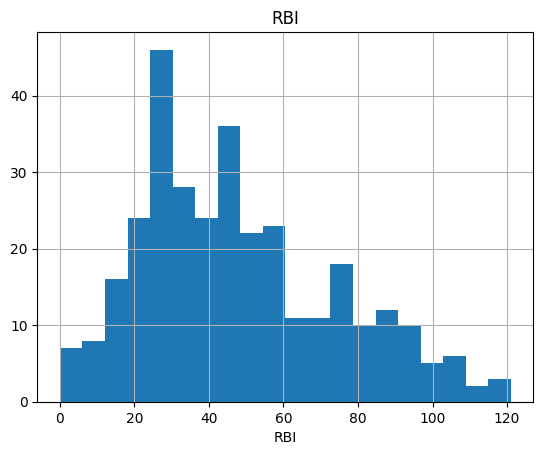

count   322.000
mean     38.742
std      21.639
min       0.000
5%       11.050
10%      15.000
20%      20.000
30%      24.000
40%      30.000
50%      35.000
60%      40.000
70%      48.700
80%      59.000
90%      69.900
95%      78.000
99%      93.580
max     105.000
Name: Walks, dtype: float64


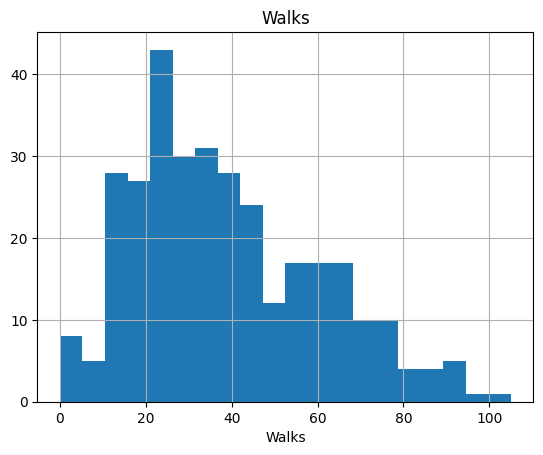

count   322.000
mean      7.444
std       4.926
min       1.000
5%        1.000
10%       2.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       7.600
70%      10.000
80%      12.000
90%      15.000
95%      17.000
99%      19.790
max      24.000
Name: Years, dtype: float64


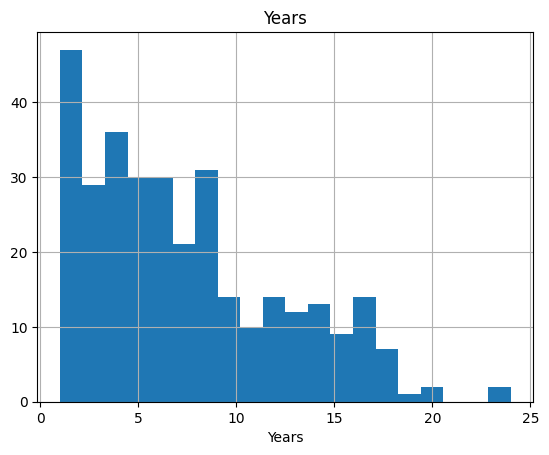

count     322.000
mean     2648.683
std      2324.206
min        19.000
5%        216.500
10%       342.200
20%       667.600
30%       963.400
40%      1402.200
50%      1928.000
60%      2654.000
70%      3365.000
80%      4483.000
90%      6123.400
95%      7125.600
99%      8749.970
max     14053.000
Name: CAtBat, dtype: float64


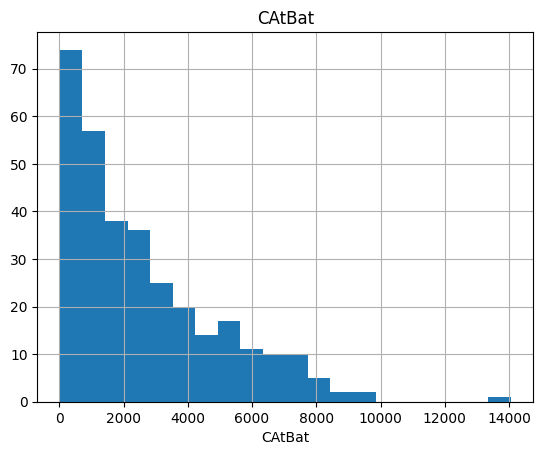

count    322.000
mean     717.571
std      654.473
min        4.000
5%        54.000
10%       86.000
20%      164.600
30%      238.000
40%      355.800
50%      508.000
60%      708.200
70%      911.100
80%     1229.200
90%     1659.600
95%     2017.150
99%     2500.340
max     4256.000
Name: CHits, dtype: float64


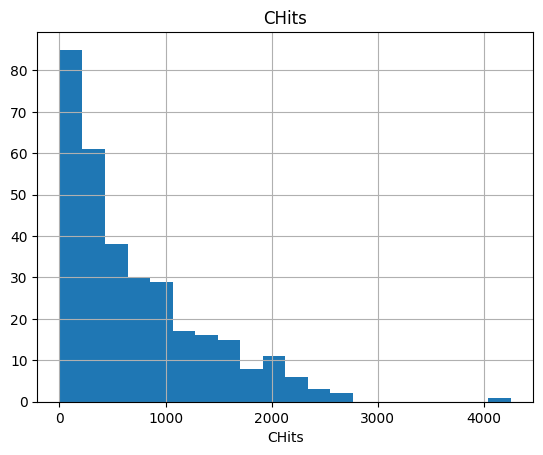

count   322.000
mean     69.491
std      86.266
min       0.000
5%        2.000
10%       4.000
20%      10.200
30%      16.300
40%      27.400
50%      37.500
60%      51.200
70%      72.400
80%     103.800
90%     194.900
95%     265.650
99%     373.120
max     548.000
Name: CHmRun, dtype: float64


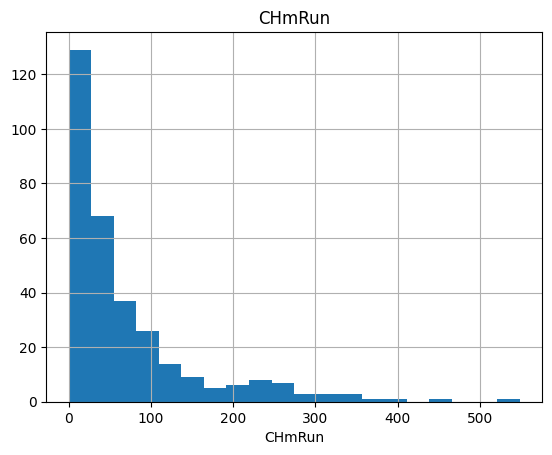

count    322.000
mean     358.795
std      334.106
min        1.000
5%        27.000
10%       38.100
20%       80.400
30%      117.300
40%      181.000
50%      247.000
60%      333.000
70%      443.400
80%      627.200
90%      895.700
95%     1032.300
99%     1174.370
max     2165.000
Name: CRuns, dtype: float64


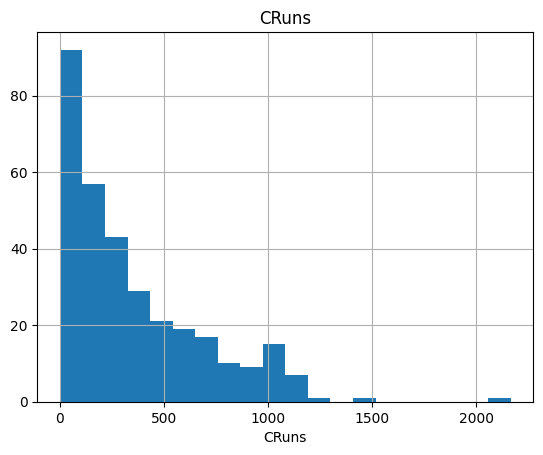

count    322.000
mean     330.118
std      333.220
min        0.000
5%        22.050
10%       34.100
20%       70.200
30%      106.300
40%      149.000
50%      220.500
60%      303.600
70%      379.100
80%      496.200
90%      861.600
95%     1071.750
99%     1310.850
max     1659.000
Name: CRBI, dtype: float64


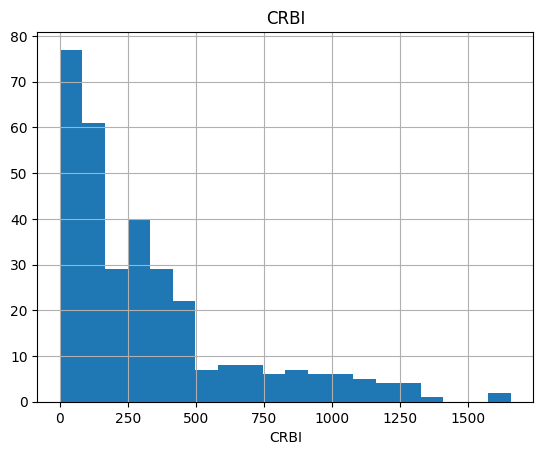

count    322.000
mean     260.239
std      267.058
min        0.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64


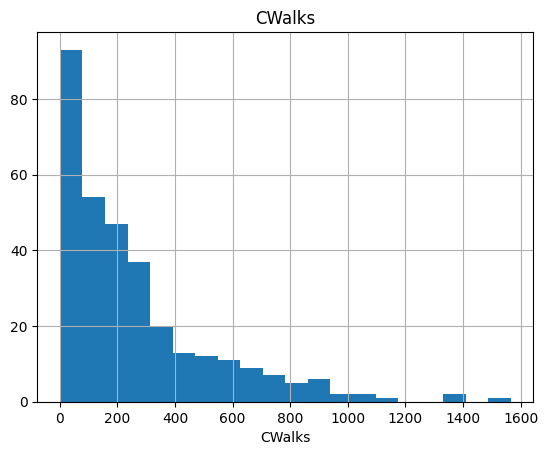

count    322.000
mean     288.938
std      280.705
min        0.000
5%        33.200
10%       62.200
20%       99.600
30%      132.000
40%      167.000
50%      212.000
60%      257.400
70%      303.000
80%      365.800
90%      685.600
95%      910.650
99%     1301.190
max     1378.000
Name: PutOuts, dtype: float64


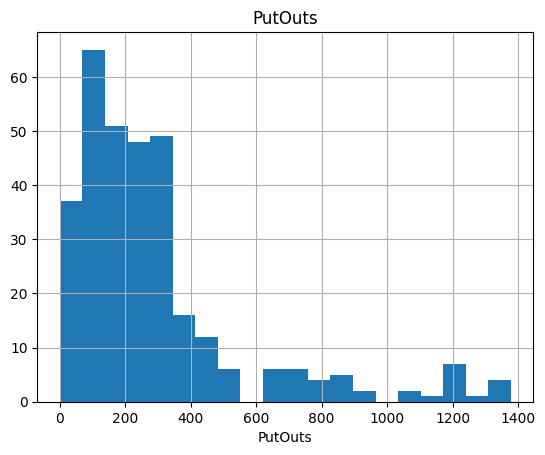

count   322.000
mean    106.913
std     136.855
min       0.000
5%        0.000
10%       2.000
20%       5.200
30%       9.000
40%      15.400
50%      39.500
60%      76.800
70%     134.800
80%     210.800
90%     353.300
95%     431.450
99%     478.160
max     492.000
Name: Assists, dtype: float64


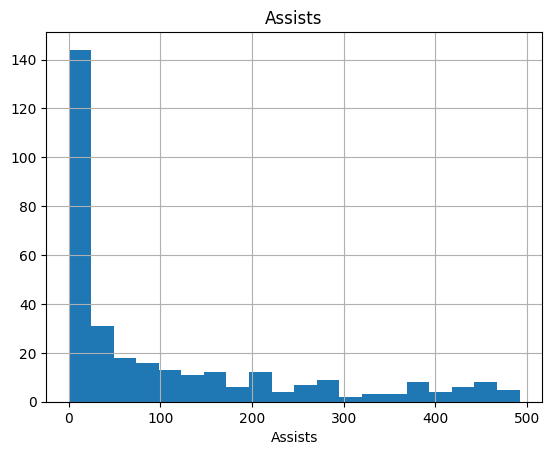

count   322.000
mean      8.040
std       6.368
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       8.000
70%      10.000
80%      13.000
90%      17.000
95%      20.000
99%      25.790
max      32.000
Name: Errors, dtype: float64


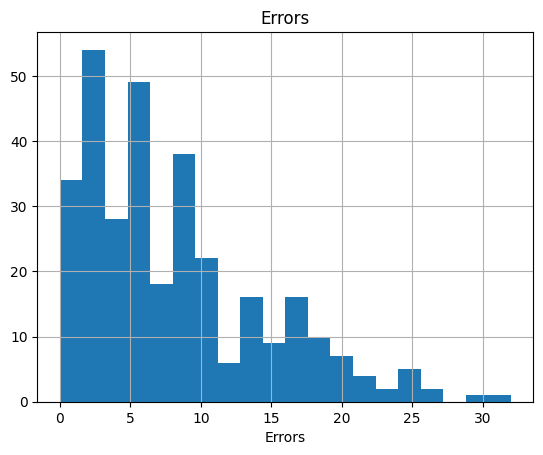

count    263.000
mean     535.926
std      451.119
min       67.500
5%        86.600
10%      100.000
20%      155.000
30%      221.000
40%      300.000
50%      425.000
60%      538.000
70%      700.000
80%      809.000
90%     1048.667
95%     1346.000
99%     2032.887
max     2460.000
Name: Salary, dtype: float64


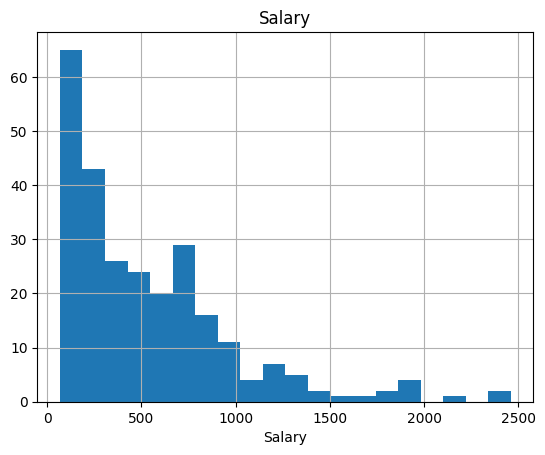

In [4]:

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car




# Veri setine göre kategorik, sayısal değişkenleri ve kategorik-sayısal karışımlarını döndürür
cat_cols, num_cols, cat_but_car = grab_col_names(df)


#################################################
# KATEGORİK DEĞİŞKEN ANALİZİ
#################################################
def cat_summary(dataframe, col_name, plot=False):
    # Kategorik değişkenin sıklık dağılımını ve oranını yazdırır
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("######################################################")
  
    # Eğer plot=True ise, kategorik değişkenin dağılımını çizdirir
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

# Kategorik değişkenler üzerinde analiz yapar ve plot gösterir
for col in cat_cols:
    cat_summary(df, col, plot=True)


#################################################
# SAYISAL DEĞİŞKEN ANALİZİ
#################################################
def num_summary(dataframe, numerical_col, plot=False):
    # Sayısal değişkenin belirli persentil değerleri ile birlikte özet istatistiklerini yazdırır
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    # Eğer plot=True ise, sayısal değişkenin histogramını çizer
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

# Sayısal değişkenler üzerinde analiz yapar ve plot gösterir
for col in num_cols:
    num_summary(df, col, plot=True)


        TARGET_MEAN
League             
A           542.000
N           529.118


          TARGET_MEAN
Division             
E             624.271
W             450.877


           TARGET_MEAN
NewLeague             
A              537.113
N              534.554




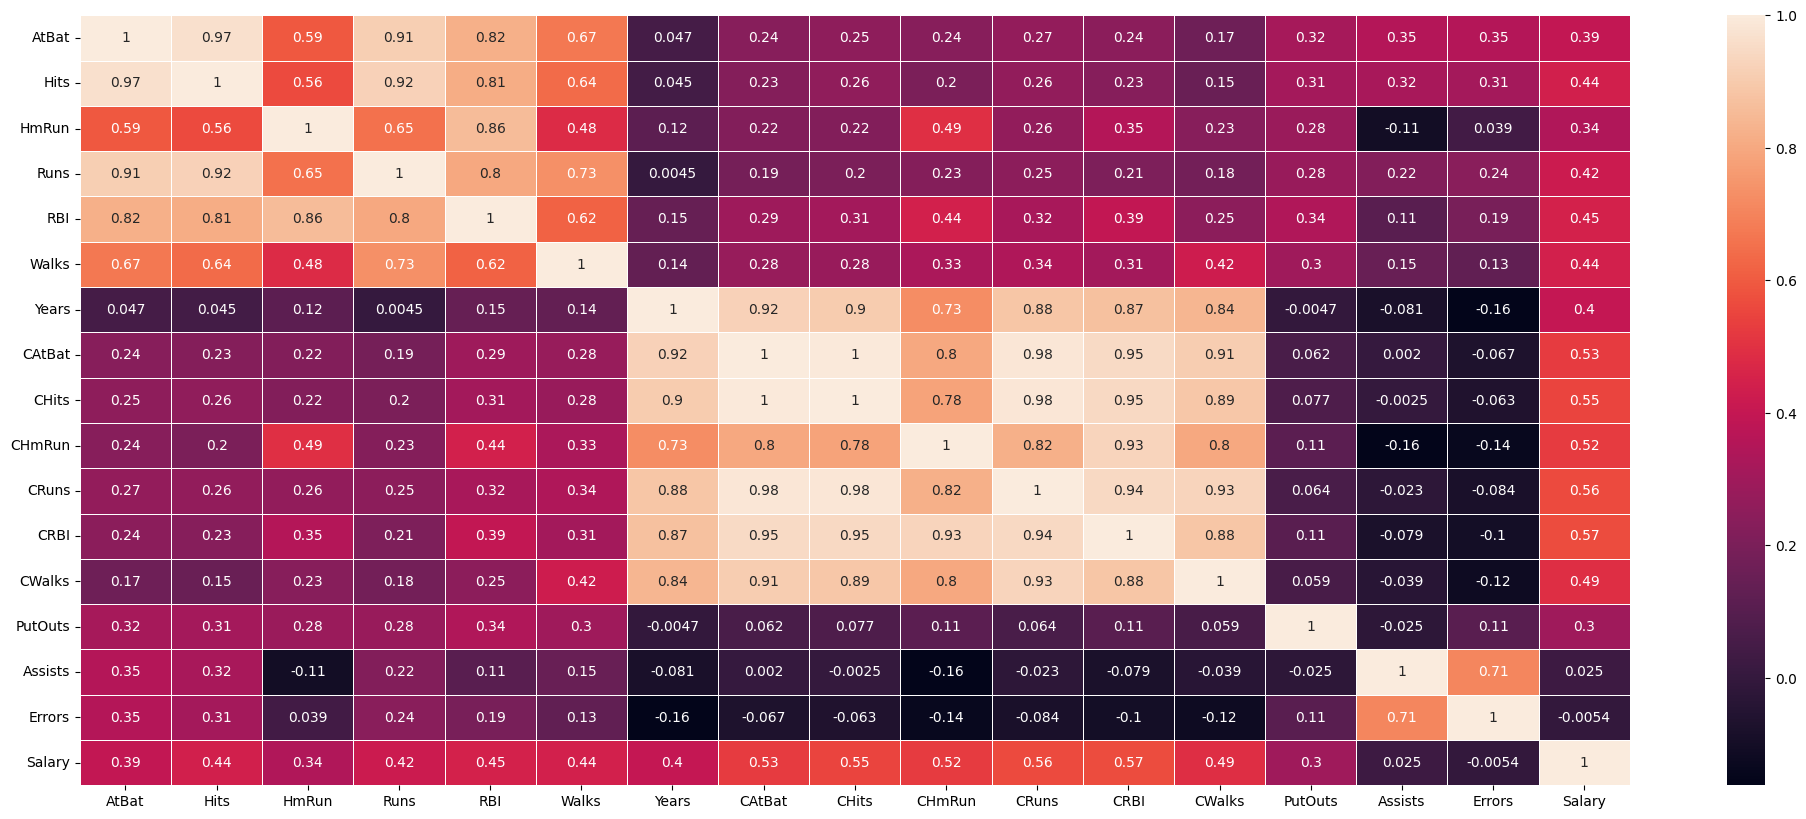

AtBat 0.39477094475973734
Hits 0.4386747378694112
HmRun 0.34302807815466363
Runs 0.4198585593019815
RBI 0.4494570879400337
Walks 0.44386726016297945
Years 0.40065699438268604
CAtBat 0.5261353096237892
CHits 0.5489095590351705
CHmRun 0.5249305595435935
CRuns 0.5626777110048051
CRBI 0.5669656856176524
CWalks 0.48982203628068005
PutOuts 0.30048035550600516
Assists 0.025436135647346703
Errors -0.005400701500953135


In [5]:


#################################################
#HEDEF DEĞİŞKEN ANALİZİ
#################################################
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}),end="\n\n\n")

for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

#################################################
#KORELASYON ANALİZİ
#################################################
df[num_cols].corr(method="spearman")

fig, ax = plt.subplots (figsize=(25,10))
sns.heatmap (df [num_cols].corr(), annot=True, linewidths=.5, ax=ax)
plt.show(block=True)


def find_correlation(dataframe, numeric_cols, corr_limit=0.50):
    high_correlations = [] 
    low_correlations = [] 
    for col in numeric_cols: 
        if col == "Salary":    
            pass
        else:
            correlation = dataframe[[col, "Salary"]].corr().loc[col, "Salary"] 
            print(col, correlation)
            if abs(correlation) > corr_limit:
                high_correlations.append(col + ":" + str(correlation)) 
            else:
                low_correlations.append(col + ": " + str(correlation))
    return low_correlations, high_correlations


low_corrs, high_corrs=find_correlation(df, num_cols)

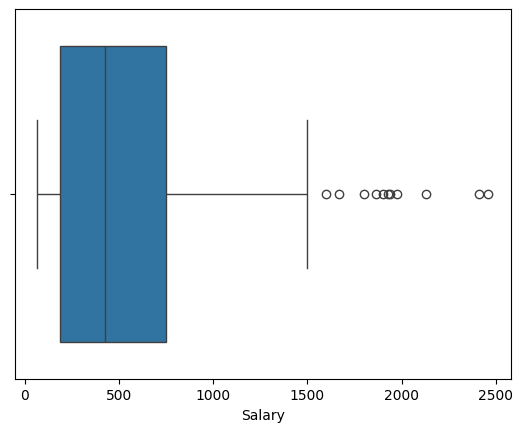

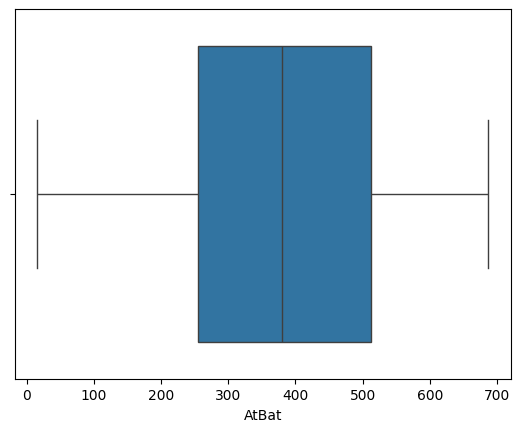

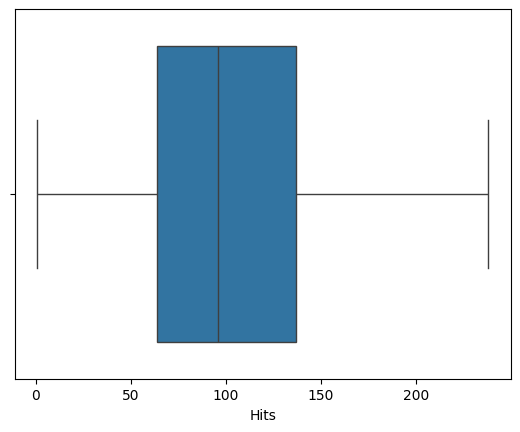

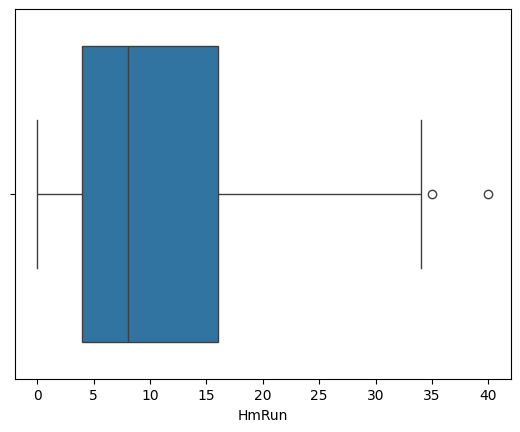

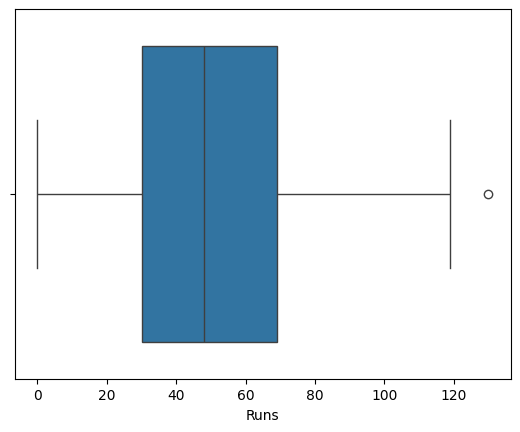

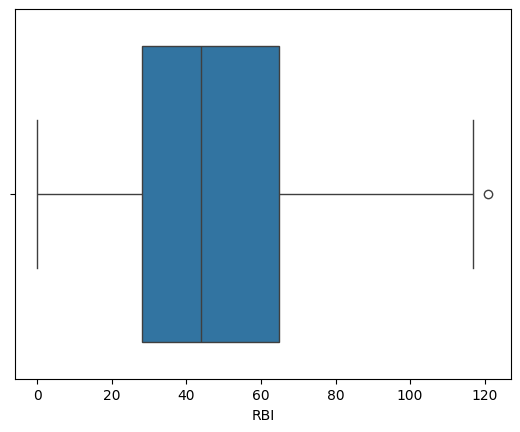

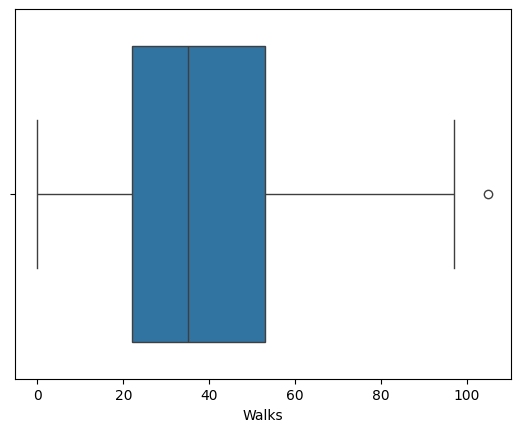

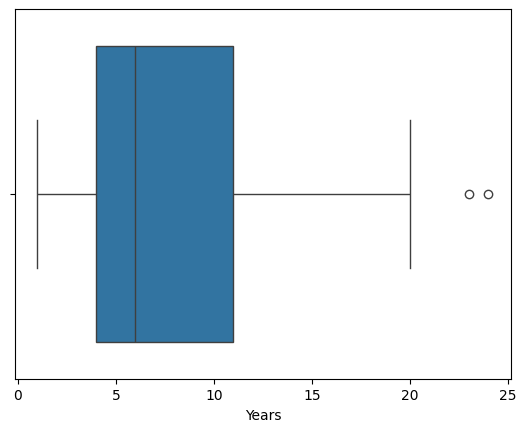

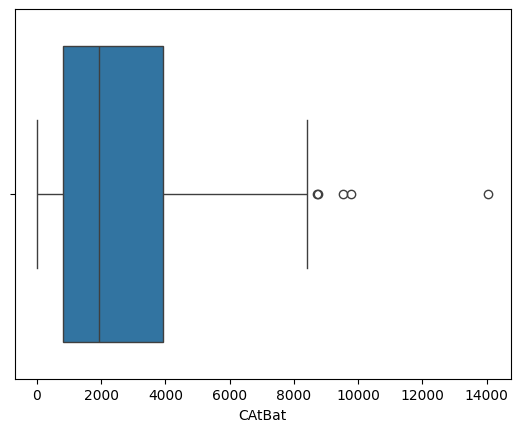

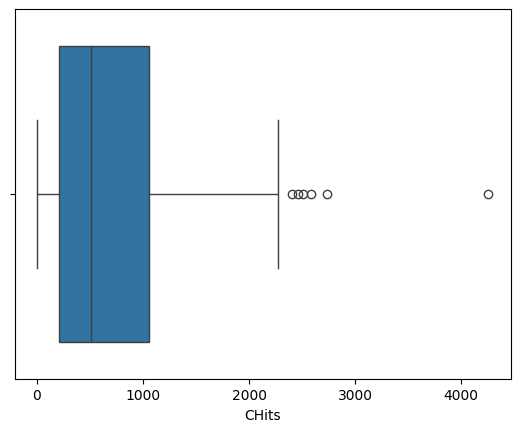

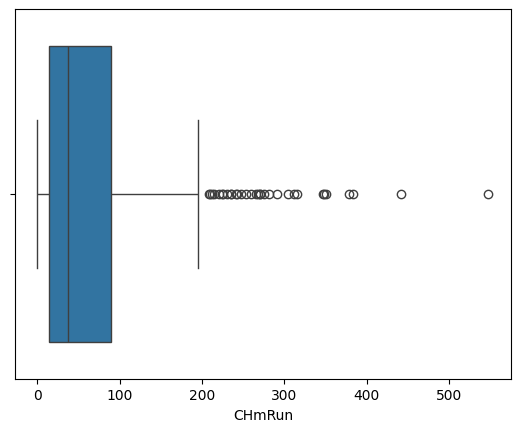

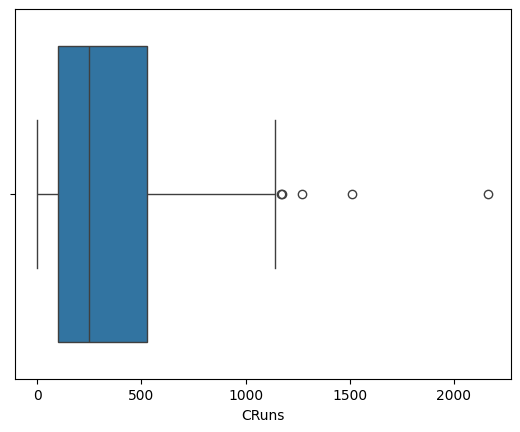

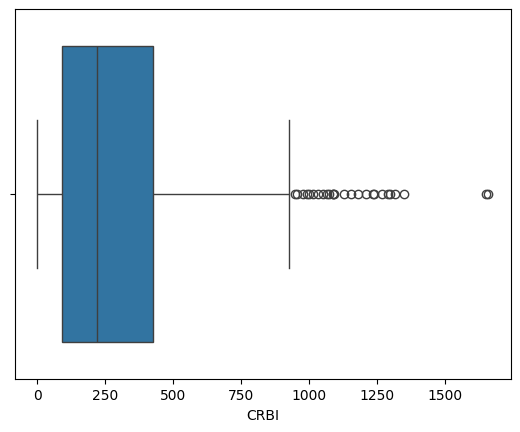

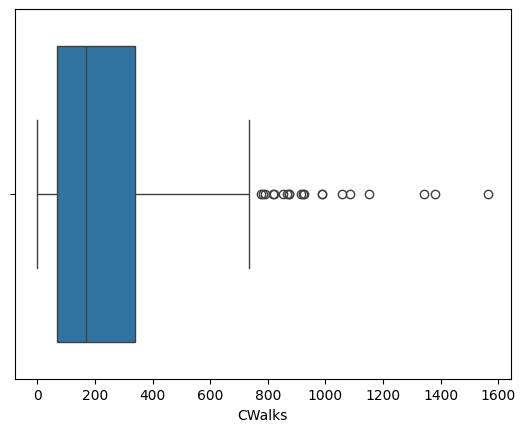

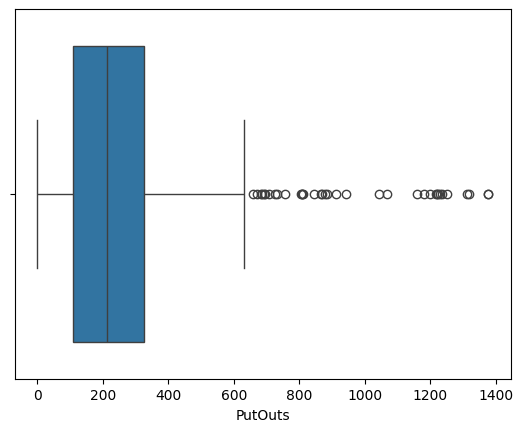

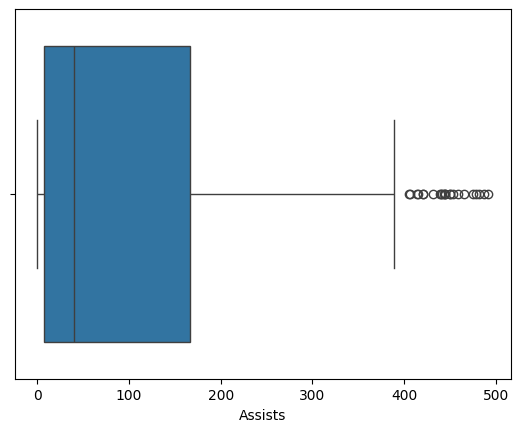

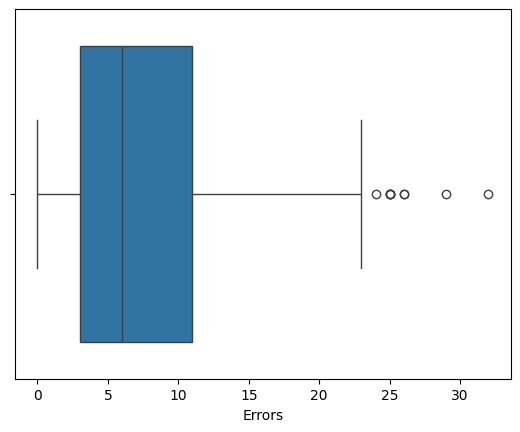

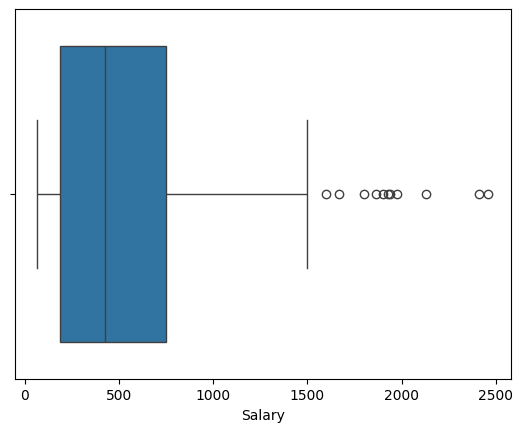

AtBat: Aykırı değer tespit edildi: Hayır
Hits: Aykırı değer tespit edildi: Hayır
HmRun: Aykırı değer tespit edildi: Evet
Runs: Aykırı değer tespit edildi: Evet
RBI: Aykırı değer tespit edildi: Evet
Walks: Aykırı değer tespit edildi: Evet
Years: Aykırı değer tespit edildi: Evet
CAtBat: Aykırı değer tespit edildi: Evet
CHits: Aykırı değer tespit edildi: Evet
CHmRun: Aykırı değer tespit edildi: Evet
CRuns: Aykırı değer tespit edildi: Evet
CRBI: Aykırı değer tespit edildi: Evet
CWalks: Aykırı değer tespit edildi: Evet
PutOuts: Aykırı değer tespit edildi: Evet
Assists: Aykırı değer tespit edildi: Evet
Errors: Aykırı değer tespit edildi: Evet
Salary: Aykırı değer tespit edildi: Evet


In [6]:
#################################################
# OUTLIERS (AYKIRI DEĞERLER)
#################################################

# Hedef değişken için boxplot
sns.boxplot(x=df["Salary"], data=df)
plt.show(block=True)

# Sayısal değişkenler için boxplot
for col in df[num_cols]:
    sns.boxplot(x=df[col], data=df)
    plt.show(block=True)

def outlier_thresholds(dataframe,col_name,q1 = 0.25 , q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 +1.5 * interquantile_range
    low_limit = quartile1 -1.5 *interquantile_range
    return low_limit , up_limit
    
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)  # Değişken adı düzeltildi
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):  # Parantezler ve operatör düzeltildi
        return True
    else:
        return False
# Aykırı değer tespiti fonksiyonu
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    
    # Aykırı değer var mı kontrolü
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return "Aykırı değer tespit edildi: Evet"
    else:
        return "Aykırı değer tespit edildi: Hayır"

# Num_cols sütunlarında outlier kontrolü yap ve çıktıları yazdır
for col in num_cols:
    print(f"{col}: {check_outlier(df, col)}")

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    
    # Aykırı değerleri limitler ile değiştirme
    dataframe.loc[dataframe[variable] < low_limit, variable] = low_limit
    dataframe.loc[dataframe[variable] > up_limit, variable] = up_limit

# Eğer outlier varsa, outlier'ları limitlerle değiştir
for col in num_cols:
    if check_outlier(df, col) == "Aykırı değer tespit edildi: Evet":
        replace_with_thresholds(df, col)


In [7]:
def missing_values_table ( datafreame , na_name=False):
    na_columns = [col for col in datafreame.columns if datafreame[col].isnull().sum()>0]
    n_miss = (datafreame[na_columns].isnull().sum()).sort_values(ascending = False)
    ratio = (datafreame[na_columns].isnull().sum() / datafreame.shape[0] * 100 ).sort_values(ascending =False)
    missing_df = pd.concat([n_miss , np.round(ratio,2)] , axis =1 , keys = ['n_miss' , 'ratio'])
    print(missing_df,end="\n")
    if na_columns:
        return na_columns

In [8]:
missing_values_table(df)

        n_miss  ratio
Salary      59 18.320


['Salary']

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.impute import KNNImputer


def eksik_veri_doldur_knn(dataframe, n_neighbors=5):
    """
    Verilen dataframe'deki eksik sayısal verileri KNN algoritması ile doldurur.
    
    Args:
        dataframe (pd.DataFrame): Eksik veri içeren pandas DataFrame.
        n_neighbors (int): KNN algoritmasında kullanılacak komşu sayısı. Default: 5.
        
    Returns:
        pd.DataFrame: Eksik verileri doldurulmuş DataFrame.
    """
    # Sayısal sütunları ayırıyoruz
    num_cols = dataframe.select_dtypes(include=['number']).columns
    
    # KNNImputer ile eksik verileri doldurma
    imputer = KNNImputer(n_neighbors=n_neighbors)
    
    # Sadece sayısal sütunlarla işlem yapıyoruz
    df_imputed = dataframe.copy()
    df_imputed[num_cols] = imputer.fit_transform(df_imputed[num_cols])
    
    return df_imputed
    
# Veriyi doldurduktan sonra standartlaştırma yapalım
df = eksik_veri_doldur_knn(df)


In [10]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [11]:

df1=df
#################################################
#FEATURE EXTRACTION(ÖZELLİK ÇIKARIMI)
#################################################

# Num_cols listesinden "Salary" sütununu çıkarıyoruz
new_num_cols = [col for col in num_cols if col != "Salary"]

# DataFrame'deki yeni sayısal sütunlara 0.0000000001 ekliyoruz (nümerik hesaplamaları iyileştirme için)
df1[new_num_cols] = df1[new_num_cols] + 0.0000000001

# Yeni sütunlar ekliyoruz ve hesaplamaları gerçekleştiriyoruz

# Hits'in AtBat'a oranı, vuruş başarı oranını hesaplamak için oluşturulmuş bir özellik
df1["Hits_Success"] = (df1["Hits"] / df1["AtBat"]) * 100

# RBI / CRBI oranı, oyuncunun ne kadar verimli koşu yaptırdığına dair bir gösterge sağlar
df1["NEW_RBI"] = df1["RBI"] / df1["CRBI"]

# Walks / cwalks oranı, oyuncunun ligdeki genel başarısını ölçmek için kullanılır
df1["NEW_Walks"] = df1["Walks"] / df1["CWalks"]

# Putouts * Years, oyuncunun yıllık başarı gösterisini belirler
df1["NEW_PutOuts"] = df1["PutOuts"] * df1["Years"]

# Hits / CHits + Hits, oyuncunun kariyerindeki hit başarı oranını artırmak için yeni bir özellik
df1["NEW_Hits"] = (df1["Hits"] / df1["CHits"]) + df1["Hits"]

# CRBI * CAtBat, oyuncunun kariyerindeki toplam verimlilikle ilgili bir özellik
df1["NEW_CRBI*CATBAT"] = df1["CRBI"] * df1["CAtBat"]

# CHits / Years, oyuncunun kariyerine göre yıllık ortalama vuruş başarısını gösterir
df1["NEW_Chits"] = df1["CHits"] / df1["Years"]

# CHmRun * Years, oyuncunun kariyerindeki yıllık değerli vuruş performansını gösterir
df1["NEW_CHmRun"] = df1["CHmRun"] * df1["Years"]

# CRuns / Years, oyuncunun kariyerine göre yıllık kazandırdığı sayıyı ölçer
df1["NEW_CRuns"] = df1["CRuns"] / df1["Years"]

# NEW_RW, RBI ve Walks arasında bir ilişkiyi gösterir; oyuncunun verimliliğine dair bir gösterge sunar
df1["NEW_RW"] = df1["RBI"] * df1["Walks"]

# CH_CB, RBI / Walks ve CHits / CAtBat arasındaki ilişkiyi gösterir; oyuncunun oyun tarzının birleşimi hakkında bilgi verir
df1["NEW_CH_CB"] = (df1["RBI"] / df1["Walks"]) * (df1["CHits"] / df1["CAtBat"])

# CHmRun / CAtBat, oyuncunun kariyerindeki her at-bat için kazandığı değerli vuruş sayısını ölçer
df1["NEW_CHmRun_CAtBat"] = df1["CHmRun"] / df1["CAtBat"]

# NEW_Diff_Atbat, oyuncunun yıllık at-bat sayısı ile toplam kariyer at-bat sayısı arasındaki farkı gösterir
df1['NEW_Diff_Atbat'] = df1['AtBat'] - (df1['CAtBat'] / df1['Years'])

# NEW_Diff_Hits, oyuncunun yıllık vuruş sayısı ile kariyer vuruş sayısı arasındaki farkı gösterir
df1['NEW_Diff_Hits'] = df1['Hits'] - (df1['CHits'] / df1['Years'])


# NEW_Diff_HmRun, oyuncunun yıllık en değerli vuruş sayısı ile kariyer en değerli vuruş sayısı arasındaki farkı gösterir
df1['NEW_Diff_HmRun'] = df1['HmRun'] - (df1['CHmRun'] / df1['Years'])

# NEW_Diff_Runs, oyuncunun yıllık kazandırdığı koşu sayısı ile kariyer kazandırdığı koşu sayısı arasındaki farkı gösterir
df1['NEW_Diff_Runs'] = df1['Runs'] - (df1['CRuns'] / df1['Years'])

# NEW_Diff_RBI, oyuncunun yıllık koşu yaptırdığı oyuncu sayısı ile kariyer koşu yaptırdığı oyuncu sayısı arasındaki farkı gösterir
df1['NEW_Diff_RBI'] = df1['RBI'] - (df1['CRBI'] / df1['Years'])

# NEW_Diff_walks, oyuncunun yıllık hata sayısı ile kariyer hata sayısı arasındaki farkı gösterir
df1['NEW_Diff_Walks'] = df1['Walks'] - (df1['CWalks'] / df1['Years'])





In [12]:
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Hits_Success,NEW_RBI,NEW_Walks,NEW_PutOuts,NEW_Hits,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_CH_CB,NEW_CHmRun_CAtBat,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks
0,293.000,66.000,1.000,30.000,29.000,14.000,1.000,293.000,66.000,1.000,30.000,29.000,14.000,A,E,446.000,33.000,20.000,84.500,A,22.526,1.000,1.000,446.000,67.000,8497.000,66.000,1.000,30.000,406.000,0.467,0.003,0.000,0.000,0.000,0.000,0.000,0.000
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,N,W,632.000,43.000,10.000,475.000,N,25.714,0.092,0.104,8848.000,81.097,1427886.000,59.643,966.000,22.929,1482.000,0.236,0.020,68.643,21.357,2.071,1.071,8.429,12.214
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,A,W,648.625,82.000,14.000,480.000,A,27.140,0.271,0.289,1945.875,130.284,431984.000,152.333,189.000,74.667,5472.000,0.267,0.039,-62.333,-22.333,-3.000,-8.667,-16.667,-11.667
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,204.000,828.000,838.000,354.000,N,E,200.000,11.000,3.000,500.000,N,28.427,0.093,0.105,2200.000,141.090,4716264.000,143.182,2244.000,75.273,2886.000,0.590,0.036,-15.636,-2.182,1.455,-10.273,1.818,4.818
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,N,E,648.625,40.000,4.000,91.500,N,27.103,0.913,0.909,1297.250,87.861,18216.000,50.500,24.000,24.000,1260.000,0.357,0.030,123.000,36.500,4.000,15.000,19.000,13.500


In [13]:
cat_cols, num_cols,cat_but_car=grab_col_names(df1)


Observations: 322
Variables: 38
cat_cols: 3
num_cols: 35
cat_but_car: 0
num_but_cat: 0


In [14]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Hits_Success,NEW_RBI,NEW_Walks,NEW_PutOuts,NEW_Hits,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_CH_CB,NEW_CHmRun_CAtBat,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks
0,293.000,66.000,1.000,30.000,29.000,14.000,1.000,293.000,66.000,1.000,30.000,29.000,14.000,A,E,446.000,33.000,20.000,84.500,A,22.526,1.000,1.000,446.000,67.000,8497.000,66.000,1.000,30.000,406.000,0.467,0.003,0.000,0.000,0.000,0.000,0.000,0.000
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,N,W,632.000,43.000,10.000,475.000,N,25.714,0.092,0.104,8848.000,81.097,1427886.000,59.643,966.000,22.929,1482.000,0.236,0.020,68.643,21.357,2.071,1.071,8.429,12.214
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,A,W,648.625,82.000,14.000,480.000,A,27.140,0.271,0.289,1945.875,130.284,431984.000,152.333,189.000,74.667,5472.000,0.267,0.039,-62.333,-22.333,-3.000,-8.667,-16.667,-11.667
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,204.000,828.000,838.000,354.000,N,E,200.000,11.000,3.000,500.000,N,28.427,0.093,0.105,2200.000,141.090,4716264.000,143.182,2244.000,75.273,2886.000,0.590,0.036,-15.636,-2.182,1.455,-10.273,1.818,4.818
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,N,E,648.625,40.000,4.000,91.500,N,27.103,0.913,0.909,1297.250,87.861,18216.000,50.500,24.000,24.000,1260.000,0.357,0.030,123.000,36.500,4.000,15.000,19.000,13.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.000,127.000,7.000,65.000,48.000,37.000,5.000,2703.000,806.000,32.000,379.000,311.000,138.000,N,E,325.000,9.000,3.000,700.000,N,25.553,0.154,0.268,1625.000,127.158,840633.000,161.200,160.000,75.800,1776.000,0.387,0.012,-43.600,-34.200,0.600,-10.800,-14.200,9.400
318,492.000,136.000,5.000,76.000,50.000,94.000,12.000,5511.000,1511.000,39.000,897.000,451.000,747.250,A,E,313.000,381.000,20.000,875.000,A,27.642,0.111,0.126,3756.000,136.090,2485461.000,125.917,468.000,74.750,4700.000,0.146,0.007,32.750,10.083,1.750,1.250,12.417,31.729
319,475.000,126.000,3.000,61.000,43.000,52.000,6.000,1700.000,433.000,7.000,217.000,93.000,146.000,A,W,37.000,113.000,7.000,385.000,A,26.526,0.462,0.356,222.000,126.291,158100.000,72.167,42.000,36.167,2236.000,0.211,0.004,191.667,53.833,1.833,24.833,27.500,27.667
320,573.000,144.000,9.000,85.000,60.000,78.000,8.000,3198.000,857.000,97.000,470.000,420.000,332.000,A,E,648.625,131.000,12.000,960.000,A,25.131,0.143,0.235,5189.000,144.168,1343160.000,107.125,776.000,58.750,4680.000,0.206,0.030,173.250,36.875,-3.125,26.250,7.500,36.500


In [15]:
# Sayısal sütunları DataFrame'den seçme, ancak 'Salary'yi hariç tutuyoruz
num_cols_without_salary = [col for col in num_cols if col != 'Salary']

# Sayısal sütunları seçme (Salary hariç)
X_num = df1[num_cols_without_salary]

# Standartlaştırma işlemi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# Standartlaştırılmış veriyi DataFrame'e dönüştürme
X_scaled_df = pd.DataFrame(X_scaled, columns=num_cols_without_salary)

# Hedef değişkeni (Salary) ayırma
y = df1['Salary']  # Hedef değişken olarak 'Salary'yi alıyoruz

# Sayısal olmayan sütunları ayırma
df_non_numeric = df1.drop(columns=num_cols_without_salary)  # Sayısal sütunları çıkar

# Standartlaştırılmış sayısal verileri orijinal DataFrame ile birleştirme
df_final = pd.concat([df_non_numeric, X_scaled_df], axis=1)

# Sonuçları yazdırma
df = df_final
df.head()

,League,Division,Salary,NewLeague,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Hits_Success,NEW_RBI,NEW_Walks,NEW_PutOuts,NEW_Hits,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_CH_CB,NEW_CHmRun_CAtBat,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks
0,A,E,84.500,A,-0.574,-0.755,-1.130,-0.805,-0.728,-1.147,-1.318,-1.043,-1.035,-0.956,-1.023,-0.995,-1.036,1.049,-0.549,1.977,-0.956,2.214,2.285,-0.658,-0.741,-0.672,-0.514,-0.682,-0.631,-0.901,0.436,-1.363,-0.513,-0.456,-0.611,-0.422,-0.608,-0.624
1,N,W,475.000,N,-0.430,-0.432,-0.434,-1.036,-0.384,0.013,1.346,0.369,0.204,0.119,-0.105,0.363,0.582,2.060,-0.471,0.337,-0.076,-0.798,-0.767,3.224,-0.437,0.002,-0.677,0.275,-0.967,-0.363,-0.634,-0.230,0.091,0.195,-0.198,-0.363,-0.109,0.252
2,A,W,480.000,A,0.640,0.625,0.840,0.582,0.918,1.729,-0.908,-0.448,-0.405,0.024,-0.411,-0.159,0.080,2.151,-0.170,0.993,0.317,-0.204,-0.137,0.035,0.624,-0.471,1.699,-0.496,1.493,1.634,-0.492,1.052,-1.061,-1.136,-1.209,-0.901,-1.594,-1.461
3,N,E,500.000,N,0.751,0.862,1.072,0.543,1.148,-0.080,0.731,1.344,1.396,2.254,1.495,1.859,0.488,-0.289,-0.719,-0.812,0.672,-0.793,-0.765,0.152,0.858,1.563,1.464,1.542,1.522,0.340,1.008,0.878,-0.651,-0.522,-0.321,-0.989,-0.500,-0.279
4,N,E,91.500,N,-0.391,-0.302,-0.087,-0.458,-0.231,-0.405,-1.113,-0.997,-0.979,-0.782,-0.966,-0.935,-0.951,2.151,-0.494,-0.648,0.307,1.926,1.975,-0.265,-0.291,-0.668,-0.912,-0.659,-0.916,-0.474,-0.072,0.473,0.569,0.656,0.186,0.407,0.517,0.344


In [16]:
def label_encoder(dataframe , binary_col_name):
    label_encoder = LabelEncoder()
    dataframe[binary_col_name] = label_encoder.fit_transform(dataframe[binary_col_name])
    return dataframe
binary_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df,col)

In [17]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique()>2]
ohe_cols
def one_hot_encoder(dataframe, categorical_cols , drop_first=True):
    dataframe = pd.get_dummies(dataframe , columns=categorical_cols , drop_first=drop_first)
    return dataframe
df=one_hot_encoder(df,ohe_cols)

df.head()

,League,Division,Salary,NewLeague,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Hits_Success,NEW_RBI,NEW_Walks,NEW_PutOuts,NEW_Hits,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_CH_CB,NEW_CHmRun_CAtBat,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks
0,0,0,84.500,0,-0.574,-0.755,-1.130,-0.805,-0.728,-1.147,-1.318,-1.043,-1.035,-0.956,-1.023,-0.995,-1.036,1.049,-0.549,1.977,-0.956,2.214,2.285,-0.658,-0.741,-0.672,-0.514,-0.682,-0.631,-0.901,0.436,-1.363,-0.513,-0.456,-0.611,-0.422,-0.608,-0.624
1,1,1,475.000,1,-0.430,-0.432,-0.434,-1.036,-0.384,0.013,1.346,0.369,0.204,0.119,-0.105,0.363,0.582,2.060,-0.471,0.337,-0.076,-0.798,-0.767,3.224,-0.437,0.002,-0.677,0.275,-0.967,-0.363,-0.634,-0.230,0.091,0.195,-0.198,-0.363,-0.109,0.252
2,0,1,480.000,0,0.640,0.625,0.840,0.582,0.918,1.729,-0.908,-0.448,-0.405,0.024,-0.411,-0.159,0.080,2.151,-0.170,0.993,0.317,-0.204,-0.137,0.035,0.624,-0.471,1.699,-0.496,1.493,1.634,-0.492,1.052,-1.061,-1.136,-1.209,-0.901,-1.594,-1.461
3,1,0,500.000,1,0.751,0.862,1.072,0.543,1.148,-0.080,0.731,1.344,1.396,2.254,1.495,1.859,0.488,-0.289,-0.719,-0.812,0.672,-0.793,-0.765,0.152,0.858,1.563,1.464,1.542,1.522,0.340,1.008,0.878,-0.651,-0.522,-0.321,-0.989,-0.500,-0.279
4,1,0,91.500,1,-0.391,-0.302,-0.087,-0.458,-0.231,-0.405,-1.113,-0.997,-0.979,-0.782,-0.966,-0.935,-0.951,2.151,-0.494,-0.648,0.307,1.926,1.975,-0.265,-0.291,-0.668,-0.912,-0.659,-0.916,-0.474,-0.072,0.473,0.569,0.656,0.186,0.407,0.517,0.344


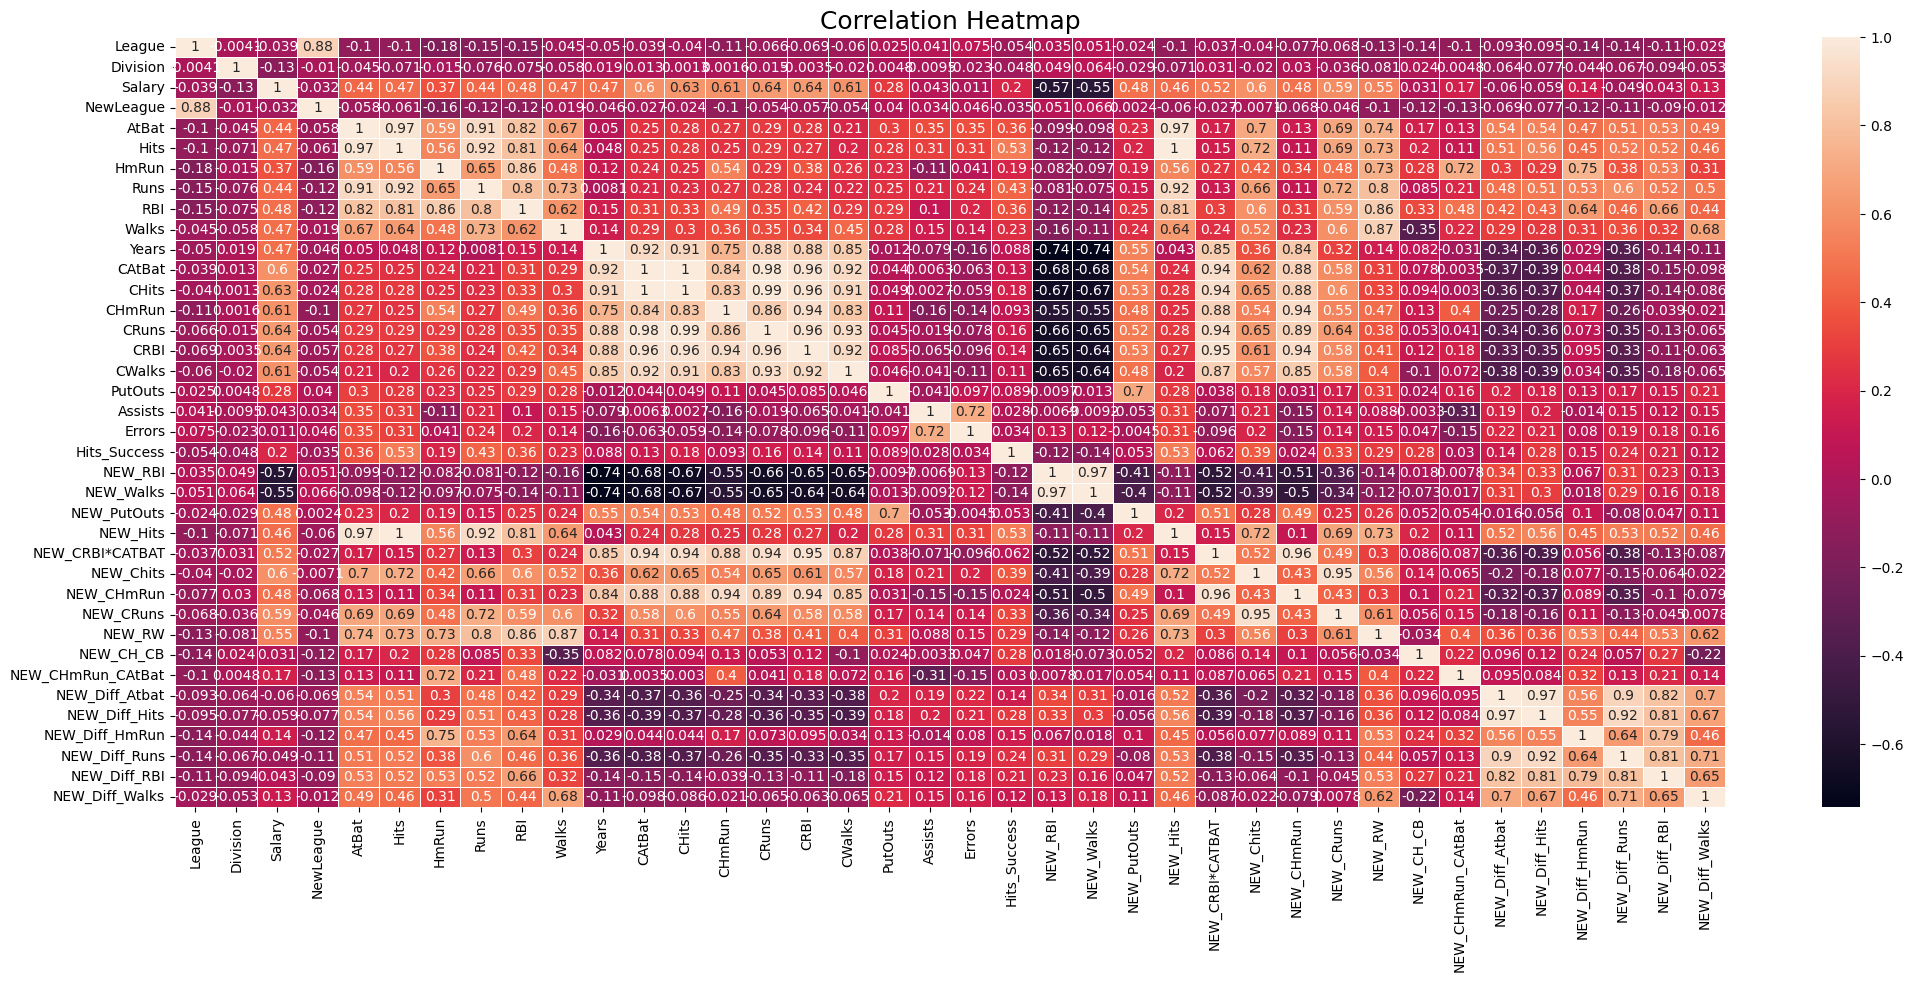

'\nyüksek korelasyonlu özellikler çıkartılarsa modelde daha başarılı bir sonuç elde edilebilir\n'

In [18]:




df[num_cols].corr(method="spearman")
# Correlation Analysis
fig, ax = plt.subplots(figsize=(25, 10))  # Grafik boyutlarını ayarla
sns.heatmap(df.corr(), annot=True, linewidths=0.5, ax=ax)  # Isı haritası oluştur
plt.title("Correlation Heatmap", fontsize=18)  # Grafik başlığı ekle
plt.show()  # Grafiği göster

# Correlation matrix
corr_matrix = df.corr()  # Korelasyon matrisi hesapla
corr_matrix  # Matrisin çıktısını göster


# Yüksek korelasyon eşik değeri
high_corr_threshold = 0.95

# Yüksek korelasyona sahip özelliklerin seti
high_corr_features = set()

# Korelasyon matrisinde gez
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > high_corr_threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Sonuçları yazdır
high_corr_features
"""
yüksek korelasyonlu özellikler çıkartılarsa modelde daha başarılı bir sonuç elde edilebilir
"""



In [19]:

#################################################
#MODELİNG
#################################################


# Eksik değerleri kaldır
df.dropna(inplace=True)

# Kalan eksik değerleri kontrol et
df.isnull().sum().sum()

# Hedef değişkeni tanımla
y = df["Salary"]

# Bağımsız değişkenleri tanımla
X = df.drop(labels=["Salary"], axis=1)

# Veri şekillerini kontrol et
print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=46)
#satır sayısı düşük olduğundan kaynaklı test_size değerini 0.2 olarak belirliyoruz

X Shape: (322, 37)
y Shape: (322,)


In [20]:
# Feature Importance
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[0:num])
    plt.title('Features Importance')
    plt.tight_layout()
    plt.show()

    if save:
        plt.savefig('importances.png')


In [21]:



# Doğrusal Regresyon için Model Değerlendirmesi
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
y_pred = model.predict(X_train)
lin_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("LINEAR REGRESSION TRAIN RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train, y_pred))))


# Model Evaluation for Linear Regression - Train and Test Scores

# Calculate and print R-squared score for training data
lin_train_r2 = linreg.score(X_train, y_train)
print("LINEAR REGRESSION TRAIN R-SQUARED: ", "{:,.3f}".format(linreg.score(X_train, y_train)))

# Predict on test data
y_pred = model.predict(X_test)

# Calculate and print RMSE for test data
lin_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("LINEAR REGRESSION TEST RMSE:", "{:,.2f}".format( np.sqrt(mean_squared_error(y_test, y_pred))))

"""
bu durumda train ve test arasında iyi bir bağlantı olduğunu tespit ediyoruz


bağımsız değişkenin bağımlı değişkeni tarif etme durumu
çok iyi olmasa bile az veri ile çalışıldığından dolayı iyi bir oran
"""

LINEAR REGRESSION TRAIN RMSE: 196.08
LINEAR REGRESSION TRAIN R-SQUARED:  0.744
LINEAR REGRESSION TEST RMSE: 207.32


'\nLINEAR REGRESSION TRAIN RMSE: 193.32\nLINEAR REGRESSION TEST RMSE: 193.60\nbu durumda train ve test arasında iyi bir bağlantı olduğunu tespit ediyoruz\n\nLINEAR REGRESSION TRAIN R-SQUARED:  0.751\nbağımsız değişkenin bağımlı değişkeni tarif etme durumu\nçok iyi olmasa bile az veri ile çalışıldığından dolayı iyi bir oran\n'

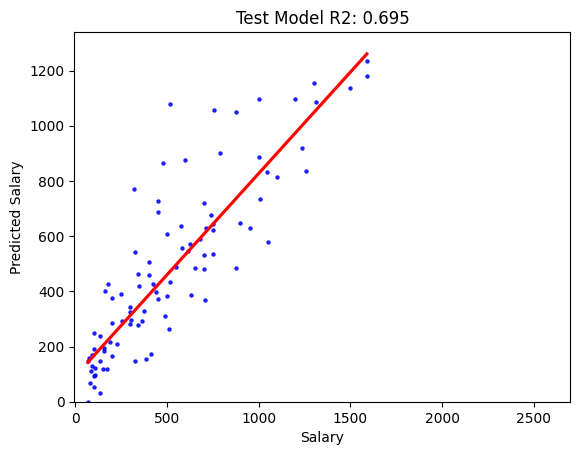

LINEAR REGRESSION CROSS_VAL_SCORE: 229.172


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     15.70
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           1.84e-39
Time:                        20:10:33   Log-Likelihood:                -1506.9
No. Observations:                 225   AIC:                             3086.
Df Residuals:                     189   BIC:                             3209.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               495.8138     26.760     18.528      0.000     443.027     548.600
League               17.4191     65.786      0.265      0.791    -112.350     147.188
Division            -27.2169     30.673     -0.887      0.376     -87.722      33.288
NewLeague            12.4854     64.553      0.193      0.847    -114.852     139.823
AtBat              -662.1429    197.725     -3.349      0.001   -1052.174    -272.112
Hits              -1020.8008   9549.822     -0.107      0.915   -1.99e+04    1.78e+04
HmRun              -172.8708    147.226     -1.174      0.242    -463.288     117.547
Runs                 23.1769     49.202      0.471      0.638     -73.878     120.232
RBI                 -28.7954    181.392     -0.159      0.874    -386.607     329.017
Walks                17.7812     84.357      0.211      0.833    -148.622     184.184
Years              -203.1448     95.022     -2.138      0.034    -390.584     -15.705
CAtBat              188.6970    350.621      0.538      0.591    -502.936     880.330
CHits                36.6936    387.675      0.095      0.925    -728.032     801.419
CHmRun              195.9506    176.479      1.110      0.268    -152.171     544.072
CRuns               189.8633    230.475      0.824      0.411    -264.771     644.498
CRBI                210.9422    263.109      0.802      0.424    -308.066     729.950
CWalks              -21.8600     85.135     -0.257      0.798    -189.798     146.078
PutOuts               3.9313     31.103      0.126      0.900     -57.423      65.285
Assists              20.7891     24.229      0.858      0.392     -27.006      68.584
Errors                8.3490     23.472      0.356      0.722     -37.951      54.649
Hits_Success       -118.3607     32.115     -3.685      0.000    -181.711     -55.010
NEW_RBI             -34.4135    119.304     -0.288      0.773    -269.753     200.926
NEW_Walks           -33.4236    114.647     -0.292      0.771    -259.577     192.729
NEW_PutOuts          75.4564     38.123      1.979      0.049       0.256     150.657
NEW_Hits           2349.6964   1.75e+04      0.135      0.893   -3.21e+04    3.68e+04
NEW_CRBI*CATBAT    -212.6943    161.990     -1.313      0.191    -532.236     106.847
NEW_Chits          -564.2991   6624.080     -0.085      0.932   -1.36e+04    1.25e+04
NEW_CHmRun         -214.3200    161.529     -1.327      0.186    -532.952     104.312
NEW_CRuns            -8.4564     93.214     -0.091      0.928    -192.330     175.417
NEW_RW              168.0413     74.390      2.259      0.025      21.301     314.782
NEW_CH_CB            22.9728     25.152      0.913      0.362     -26.641      72.587
NEW_CHmRun_CAtBat    62.6092     43.548      1.438      0.152     -23.293     148.511
NEW_Diff_Atbat      345.0046    161.253      2.140      0.034      26.917

In [22]:


# Test part regplot for visualizing predictions vs actual values
g = sns.regplot(
    x=y_test,
    y=y_pred,
    scatter_kws={'color': 'b', 's': 5},
    ci=False,
    color="r"
)
g.set_title(f"Test Model R2: {linreg.score(X_test, y_test):.3f}")
g.set_ylabel("Predicted Salary")
g.set_xlabel("Salary")
plt.xlim(-5, 2700)
plt.ylim(bottom=0)
plt.show(block=True)


# Calculate cross-validation score
print("LINEAR REGRESSION CROSS_VAL_SCORE:", "{:,.3f}".format(np.mean(np.sqrt(-cross_val_score(
    model,
    X,
    y,
    cv=10,
    scoring="neg_mean_squared_error" ))))) 
"""LINEAR REGRESSION CROSS_VAL SCORE: 225.509"""                                                                                        
#bu pek iyi bir yöntem olmaz çünkü verisetimizde sütun sayımız az 

X_train_sm=sm.add_constant(X_train)

model_sm=sm.OLS(y_train, X_train_sm).fit()

model_summary=model_sm.summary()
model_summary



LGBM Train RMSE: 86.53 

LGBM Test RMSE: 216.97 

LGBM Train R2: 0.95 

LGBM Test R2: 0.67
Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_samples': 20, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.7}

LightGBM Tuned Test RMSE: 204.62 

LightGBM Tuned Test MAE: 152.74 

LightGBM Tuned Test R^2: 0.70 



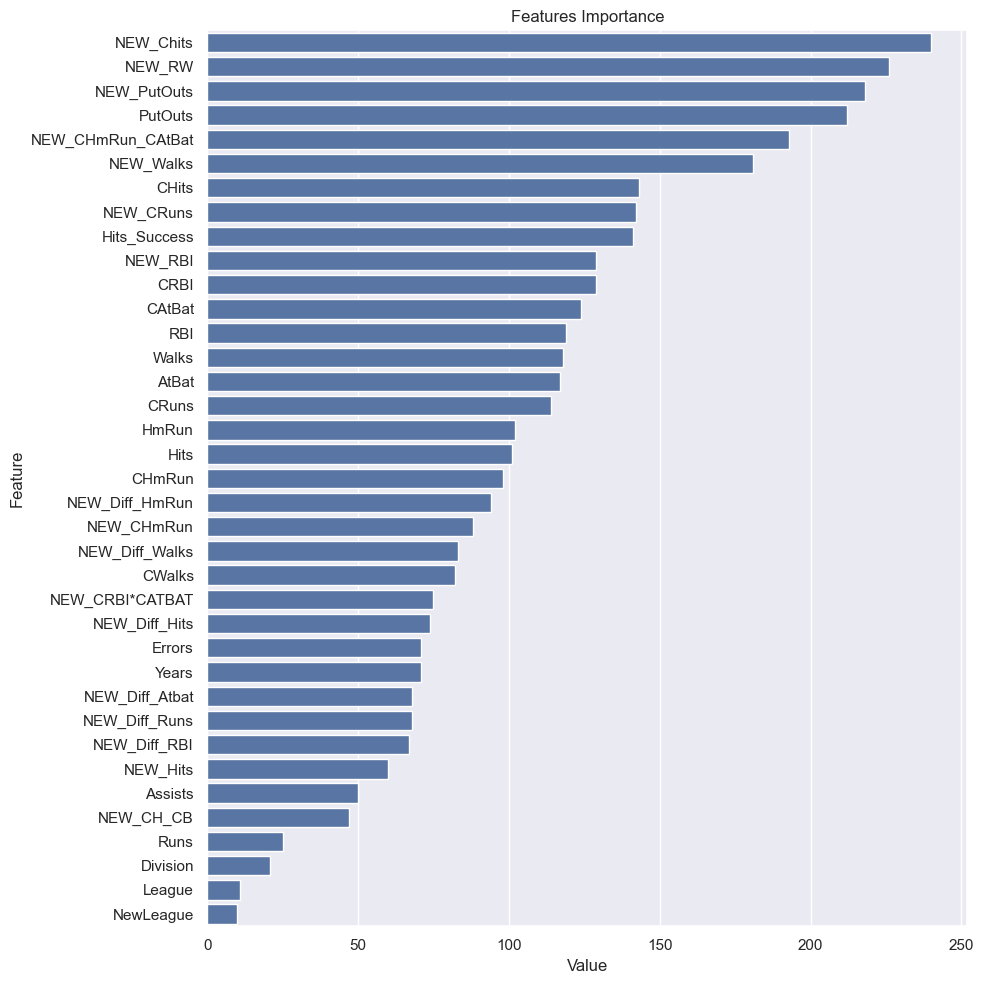

In [23]:

from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modeli tanımlayıp eğitelim
lgb_model = LGBMRegressor(verbose=-1).fit(X_train, y_train)

# Train Error
y_pred = lgb_model.predict(X_train)

# Test Error
y_pred1 = lgb_model.predict(X_test)

# Train RMSE ve R2
lightgbm_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
lightgbm_train_r2 = r2_score(y_train, y_pred)

# Test RMSE ve R2
lightgbm_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
lightgbm_test_r2 = r2_score(y_test, y_pred1)

# Sonuçları yazdıralım
print("LGBM Train RMSE:", "{:,.2f}".format(lightgbm_train_rmse), "\n")
print("LGBM Test RMSE:", "{:,.2f}".format(lightgbm_test_rmse), "\n")
print("LGBM Train R2:", "{:,.2f}".format(lightgbm_train_r2), "\n")
print("LGBM Test R2:", "{:,.2f}".format(lightgbm_test_r2))

"""

regresyondan daha başarısız bir model çünkü LGBM çok fazla veri isteyen bir modeldir
lineer regresyon ile arasıdna büyük bir fark yok ancak performans olarak daha fazla kayıp yaşanır
"""

#################################################
#HİPERPARAMETRE
#################################################

# Model Parametreleri(Hiperparametreler)
lgb_model = LGBMRegressor()

lgb_params = {
    "learning_rate": [0.01, 0.05, 0.1],  # Düşükten biraz daha yükseğe
    "n_estimators": [500, 1000, 1500],  # Daha fazla ağaç sayısı
    "max_depth": [3, 5, 7],  # Derinliği biraz artırdık
    "colsample_bytree": [0.8, 0.7, 0.6],  # Özelliklerin biraz daha fazla kısmı
    "subsample": [0.7, 0.8, 1],  # Verinin daha fazla kısmını kullanma
    "min_child_samples": [20, 30, 50],  # Daha fazla çocuk örnek sayısı
    "reg_alpha": [0.1, 0.5],  # L1 regularization
    "reg_lambda": [0.1, 0.5],  # L2 regularization
}

# GridSearchCV ile en iyi parametreleri bulma
lgb_cv_model = GridSearchCV(
    lgb_model,
    lgb_params,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Modeli eğitme
lgb_cv_model.fit(X_train, y_train)

# En iyi parametreleri yazdırma
print("Best Parameters:", lgb_cv_model.best_params_)




# LightGBM Modeli ile Eğitim (Hyperparametre Ayarlarıyla)
lgb_tuned = LGBMRegressor(**lgb_cv_model.best_params_).fit(X_train, y_train)

# Test Verisi ile Tahmin Yapma
y_pred = lgb_tuned.predict(X_test)

# Modelin Performansını Değerlendirme
lightgbm_tuned_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lightgbm_tuned_test_r2 = r2_score(y_test, y_pred)
lightgbm_tuned_test_mae = mean_absolute_error(y_test, y_pred)

# Sonuçları Yazdırma
print("\nLightGBM Tuned Test RMSE:", "{:,.2f}".format(lightgbm_tuned_test_rmse), "\n")
print("LightGBM Tuned Test MAE:", "{:,.2f}".format(lightgbm_tuned_test_mae), "\n")
print("LightGBM Tuned Test R^2:", "{:,.2f}".format(lightgbm_tuned_test_r2), "\n")


# Feature Importance Fonksiyonu
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).iloc[:num])
    
    plt.title('Features Importance')
    plt.tight_layout()
    plt.show()
    
    if save:
        plt.savefig('importances.png')

# Feature Importance Görselleştirme
plot_importance(lgb_tuned, X_test)







In [24]:
from xgboost import XGBRegressor


# XGBoost modelini oluşturuyoruz
xgboost_model = XGBRegressor(random_state=17)

# Hiperparametre aralıkları
xgboost_params = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5, 6, 7, 8],
    "n_estimators": [100, 200, 300, 500, 1000],
    "colsample_bytree": [0.6, 0.7, 0.8, 1.0]
}

# GridSearchCV ile model araması yapıyoruz
grid_search = GridSearchCV(xgboost_model, xgboost_params, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error', verbose=1)

# Eğitim verisi üzerinde GridSearchCV'yi eğitiyoruz
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdırıyoruz
print("En iyi parametreler: ", grid_search.best_params_)

# En iyi model ile test verisi üzerinde tahmin yapalım
best_model = grid_search.best_estimator_

# Test verisi üzerinde model değerlendirmesi
y_pred = best_model.predict(X_test)

# Regresyon için metrikler
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test seti MAE (Mean Absolute Error): {mae:.4f}")
print(f"Test seti MSE (Mean Squared Error): {mse:.4f}")
print(f"Test seti R2 skoru: {r2:.4f}")


Fitting 5 folds for each of 480 candidates, totalling 2400 fits
En iyi parametreler:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Test seti MAE (Mean Absolute Error): 140.5043
Test seti MSE (Mean Squared Error): 39711.8776
Test seti R2 skoru: 0.7179


RF Train RMSE: 79.60
RF Test RMSE: 201.55 

RF Train MAE: 49.53
RF Test MAE: 141.47 

RF Train R^2: 0.96
RF Test R^2: 0.71
Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'max_depth': 8, 'max_features': 15, 'min_samples_split': 8, 'n_estimators': 500}
RF_TUNED Test RMSE: 199.39 

RF_TUNED Test MAE: 138.60 

RF_TUNED Test R^2: 0.72


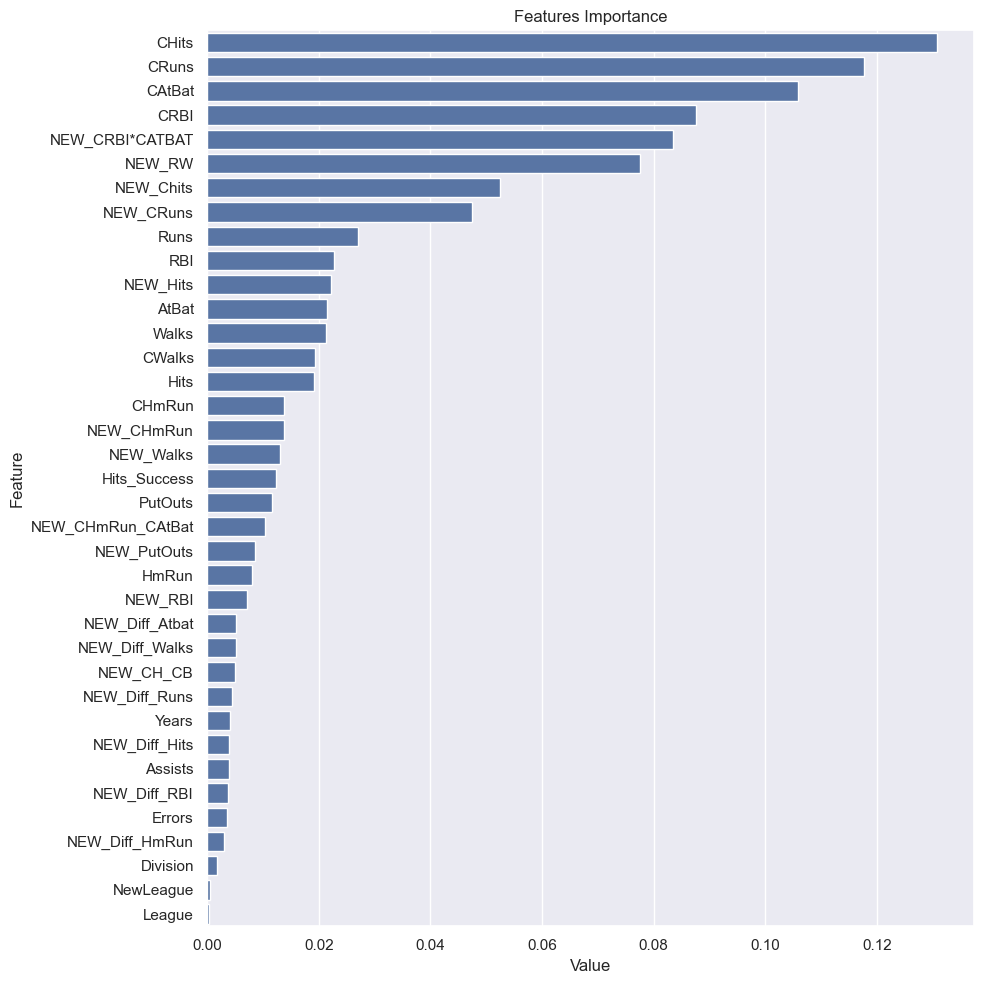

In [25]:

# Modelin eğitilmesi
rf_model = RandomForestRegressor().fit(X_train, y_train)

# Train Error
y_pred = rf_model.predict(X_train)

# Test Error
y_pred1 = rf_model.predict(X_test)

# Train RMSE ve Test RMSE
rf_train_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred1))

# Train R^2 ve Test R^2
rf_train_r2 = r2_score(y_train, y_pred)
rf_test_r2 = r2_score(y_test, y_pred1)

# Sonuçların yazdırılması
print("RF Train RMSE:", "{:,.2f}".format(rf_train_rmse))
print("RF Test RMSE:", "{:,.2f}".format(rf_test_rmse), "\n")
print("RF Train MAE:", "{:,.2f}".format(mean_absolute_error(y_train, y_pred)))
print("RF Test MAE:", "{:,.2f}".format(mean_absolute_error(y_test, y_pred1)), "\n")
print("RF Train R^2:", "{:,.2f}".format(rf_train_r2))
print("RF Test R^2:", "{:,.2f}".format(rf_test_r2))

# Model Parametreleri
rf_params = {
    "max_depth": [5, 8, None],
    "max_features": [3, 5, 15],
    "n_estimators": [200, 500],
    "min_samples_split": [2, 5, 8]
}

# GridSearchCV ile en iyi parametreleri bulma
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=1)

# Modeli eğitme
rf_cv_model.fit(X_train, y_train)

# En iyi parametreleri yazdırma
print(rf_cv_model.best_params_)


# RF TUNED Model
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)

# Tahminler
y_pred = rf_tuned.predict(X_test)

# Test Error (RMSE ve R^2)
rf_tuned_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_tuned_test_r2 = r2_score(y_test, y_pred)

# Sonuçları Yazdırma
print("RF_TUNED Test RMSE:", "{:,.2f}".format(rf_tuned_test_rmse), "\n")
print("RF_TUNED Test MAE:", "{:,.2f}".format(mean_absolute_error(y_test, y_pred)), "\n")
print("RF_TUNED Test R^2:", "{:,.2f}".format(rf_tuned_test_r2))



plot_importance(rf_tuned, X_test)
